In [1]:
import imdlib as imd
import xarray as xr
import pandas as pd
import numpy as np

start_yr = 1980
end_yr = 2017

#variable = 'tmin' 
#data_min = imd.get_data(variable, start_yr, end_yr, fn_format='yearwise')
#d_temp_min = data_min.get_xarray()  
variable = 'tmax' 
data_max = imd.get_data(variable, start_yr, end_yr,fn_format='yearwise')
d_temp_max = data_max.get_xarray()

Downloading: maxtemp for year 1980
Downloading: maxtemp for year 1981
Downloading: maxtemp for year 1982
Downloading: maxtemp for year 1983
Downloading: maxtemp for year 1984
Downloading: maxtemp for year 1985
Downloading: maxtemp for year 1986
Downloading: maxtemp for year 1987
Downloading: maxtemp for year 1988
Downloading: maxtemp for year 1989
Downloading: maxtemp for year 1990
Downloading: maxtemp for year 1991
Downloading: maxtemp for year 1992
Downloading: maxtemp for year 1993
Downloading: maxtemp for year 1994
Downloading: maxtemp for year 1995
Downloading: maxtemp for year 1996
Downloading: maxtemp for year 1997
Downloading: maxtemp for year 1998
Downloading: maxtemp for year 1999
Downloading: maxtemp for year 2000
Downloading: maxtemp for year 2001
Downloading: maxtemp for year 2002
Downloading: maxtemp for year 2003
Downloading: maxtemp for year 2004
Downloading: maxtemp for year 2005
Downloading: maxtemp for year 2006
Downloading: maxtemp for year 2007
Downloading: maxtemp

From here, we take up two coordinates mentioed below. We pick up tmax.
Coordinates Picked: 

A) Himalayas:   (34.5,73.5)-1991 m |
(32.5,75.5)-582 m

B) Plains:  (26.5,86.5)-75 m |
(25.5,87.5)-32 m

In [2]:
lat = 34.5
lon = 73.5
data_max.to_csv('Hh.csv', lat, lon)
lat = 32.5
lon = 75.5
data_max.to_csv('Hl.csv', lat, lon)

In [3]:
lat = 26.5
lon = 86.5
data_max.to_csv('Lh.csv', lat, lon)
lat = 25.5
lon = 87.5
data_max.to_csv('Ll.csv', lat, lon)

# A) Himalayan region

### Mann Kendall's Test (1991 m)

In [55]:
import pymannkendall as mk
import numpy as np

In [56]:
Hh=pd.read_csv('Hh.csv',index_col=False)

In [57]:
Hh['time'] = pd.to_datetime(Hh['time'])   #dont run again. will give error because data will overlap
Hh=Hh.set_index('time')
#a.dtypes
#a.head()

In [58]:
Hh.replace(99.9,np.nan, inplace=True)
Hh.interpolate(method='linear',inplace=True)

In [59]:
result=mk.original_test(Hh)
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=8.447826422813845, Tau=0.08334169048094546, s=870101.0, var_s=10608363036.333334, slope=0.0006802721088435376, intercept=20.324768367346937)


###  Mann Kendall's Test (582 m)

In [12]:
Hl=pd.read_csv('Hl.csv',index_col=False)

In [13]:
Hl['time'] = pd.to_datetime(Hl['time'])   #dont run again. will give error because data will overlap
Hl=Hl.set_index('time')

In [14]:
result=mk.original_test(Hl)
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=8.684212116193027, Tau=0.08567374174641876, s=894448.0, var_s=10608363143.333334, slope=0.000691754288876591, intercept=24.099687327061428)


### Thiel-Sen Slope Test  (1991 m)

In [95]:
from scipy import stats
import matplotlib.pyplot as plt

In [101]:
index=list(range(1,4571))
res = stats.theilslopes(Hh['temp'],index, 0.95)

In [102]:
print('medslope =',res[0])
print('medintercept =',res[1])
print('lo_slope =',res[2])
print('Hi_slope =',res[3])

medslope = 0.0006802721088435376
medintercept = 20.324088095238096
lo_slope = 0.0005221932114882503
Hi_slope = 0.0008383233532934131


1) medslope : float.  Theil slope.
2) medintercept : float. Intercept of the Theil line, as median(y) - medslope*median(x).
3) lo_slope : float. Lower bound of the confidence interval on medslope.
4) up_slope : float. Upper bound of the confidence interval on medslope.

### Thiel-Sen Slope Test  (582 m) 

In [103]:
index=list(range(1,4571))
res = stats.theilslopes(Hl['temp'],index, 0.95)

In [104]:
print('medslope =',res[0])
print('medintercept =',res[1])
print('lo_slope =',res[2])
print('Hi_slope =',res[3])

medslope = 0.000691754288876591
medintercept = 24.09899557277255
lo_slope = 0.000536277602523661
Hi_slope = 0.0008488063660477461


### Anomaly of Moving Average - 1991 m

In [62]:
avg1=Hh['temp'].sum()
sub1=avg1/len(Hh)
#print(sub1)
Hh['anom']=Hh['temp']-sub1

<AxesSubplot:xlabel='time'>

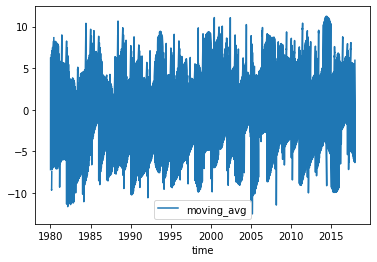

In [72]:
import seaborn as sns
#a=a.drop(['temp'],axis=1)
sns.lineplot(data=Hh.drop(['temp','anom'],axis=1))

<AxesSubplot:xlabel='time'>

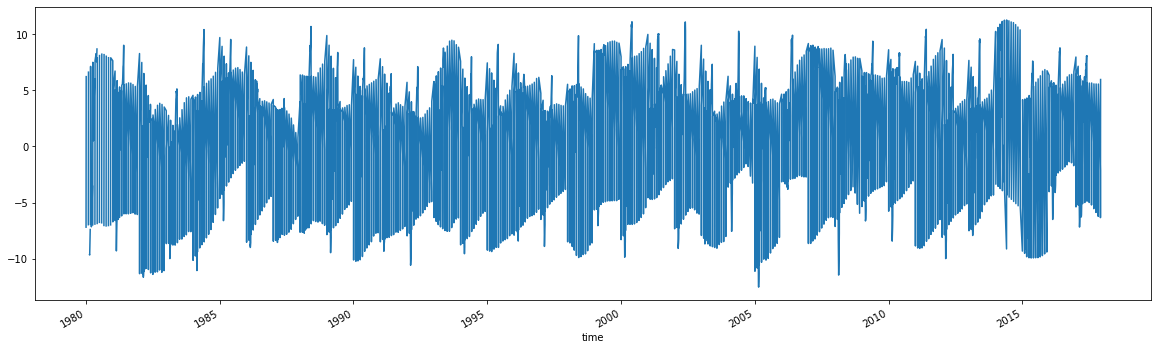

In [70]:
#a['anom'].plot(figsize=(10,6))
Hh['anom'].rolling(window =20).mean().plot(figsize=(20,6))

In [73]:
Hh['rolling_window'] =Hh['anom'].rolling(window=20).mean()
#a.head(30)

In [84]:
#Hh.drop(['moving_avg'],axis=1, inplace=True)
Hh.head(4)

,temp,anom,rolling_window
time,,,
1980-01-02,13.80,-8.148435,NaN
1980-02-02,14.16,-7.788435,NaN
1980-03-02,9.18,-12.768435,NaN
1980-04-02,11.97,-9.978435,NaN


In [86]:
#sns.scatterplot(data=Hh.drop(['temp','anom'],axis=1))

# B) Plains 


### Mann Kendall's Test (75 m)

In [24]:
Lh=pd.read_csv('Lh.csv',index_col=False)

In [25]:
Lh['time'] = pd.to_datetime(Lh['time'])   #dont run again. will give error because data will overlap
Lh=Lh.set_index('time')
#b['time']=pd.to_datetime(b['time'], format="%Y-%m-%d")  #for places where one wants to change time format
#b.head()

In [26]:
result=mk.original_test(Lh)
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=0.00011429132163165434, z=3.8580584449080497, Tau=0.03806156320326355, s=397369.0, var_s=10608358214.333334, slope=0.00018912193387842036, intercept=32.81795094205475)


### Mann Kendall's Test (32 m)

In [27]:
Ll=pd.read_csv('Ll.csv',index_col=False)

In [28]:
Ll['time'] = pd.to_datetime(Ll['time'])   #dont run again. will give error because data will overlap
Ll=Ll.set_index('time')

In [29]:
result=mk.original_test(Ll)
print(result)

Mann_Kendall_Test(trend='no trend', h=False, p=0.2032490556513089, z=1.272349254182274, Tau=0.012552387821456845, s=131049.0, var_s=10608356731.0, slope=5.686800894854606e-05, intercept=33.170085033557044)


### Thiel-Sen Slope Test  (75 m)

In [91]:
index=list(range(1,4571))
res = stats.theilslopes(Lh['temp'],index, 0.95)

In [92]:
print('medslope =',res[0])
print('medintercept =',res[1])
print('lo_slope =',res[2])
print('Hi_slope =',res[3])

medslope = 0.00018912193387842036
medintercept = 32.81776182012087
lo_slope = 9.314703925482406e-05
Hi_slope = 0.00028497596153845923


### Thiel-Sen Slope Test  (32 m)

In [93]:
index=list(range(1,4571))
res = stats.theilslopes(Ll['temp'],index, 0.95)

In [94]:
print('medslope =',res[0])
print('medintercept =',res[1])
print('lo_slope =',res[2])
print('Hi_slope =',res[3])

medslope = 5.686800894854606e-05
medintercept = 33.170028165548096
lo_slope = -3.0557677616500494e-05
Hi_slope = 0.00014539579967689798


### Anomaly of Moving Average 

In [113]:
avg1=Ll['temp'].sum()
sub2=avg1/len(Ll)
print(sub2)
Ll['anom']=Ll['temp']-sub2

32.63883781181619


<AxesSubplot:xlabel='time'>

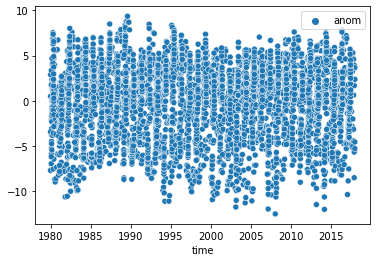

In [114]:
import seaborn as sns
#a=a.drop(['temp'],axis=1)
sns.scatterplot(data=Ll.drop(['temp'],axis=1))  

<AxesSubplot:xlabel='time'>

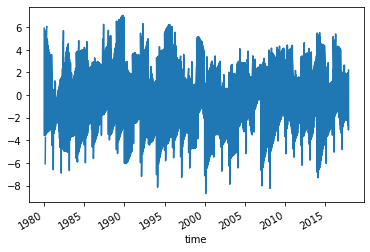

In [115]:
#b['anom'].plot(figsize=(10,6))
Ll['anom'].rolling(window =20).mean().plot()

In [116]:
Ll['moving_avg'] = Ll['anom'].rolling(window=20).mean()
#b.head(30)    # to get the moving average values

In [117]:
Ll.head()

,temp,anom,moving_avg
time,,,
1980-01-02,24.95,-7.688838,NaN
1980-02-02,25.69,-6.948838,NaN
1980-03-02,26.46,-6.178838,NaN
1980-04-02,26.38,-6.258838,NaN
1980-05-02,25.10,-7.538838,NaN


# Using ADCF test(for testing stationarity) + other methods of seasonality removal 

In [108]:
Hh=pd.read_csv('Hh.csv')
Hh.replace(99.9,np.nan, inplace=True)
Hh.interpolate(method='linear',inplace=True)
Hh['time']=pd.to_datetime(Hh['time'],infer_datetime_format=True)
ai=Hh.set_index(['time'])

In [109]:
from datetime import datetime
#ai.head(5)

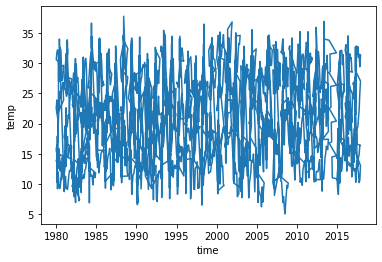

In [110]:
plt.xlabel('time')
plt.ylabel('temp')
plt.plot(ai)

In [111]:
from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller test results:')
dftest=adfuller(ai['temp'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print(dfoutput)

Dickey Fuller test results:
Test Statistic                -1.093130e+01
p-value                        9.807884e-20
#Lags Used                     4.000000e+00
Number of observations Used    4.565000e+03
Critical Value (1%)           -3.431783e+00
Critical Value (5%)           -2.862173e+00
Critical Value (10%)          -2.567107e+00
dtype: float64


The above series is Stationary as p-value < 0.05
_#Null hypothesis is that the data is Stationary